
<font color=blue size=6 face=雅黑>part1建立模型</font>

In [1]:
import tensorflow as tf

def creat_model():
        inputs = tf.keras.layers.Input(shape=(1024,1))

        x=tf.keras.layers.Conv1D(filters=64,kernel_size=3,strides=1,padding='same',activation='relu')(inputs)
        x=tf.keras.layers.BatchNormalization()(x)
        x=tf.keras.layers.Conv1D(filters=64,kernel_size=3,strides=1,padding='same',activation='relu')(x)
        x=tf.keras.layers.BatchNormalization()(x) ##1024*59


        x1=tf.keras.layers.MaxPooling1D(padding='same')(x)  ###512*59
        x1=tf.keras.layers.Conv1D(filters=128,kernel_size=3,strides=1,padding='same',activation='relu')(x1)
        x1=tf.keras.layers.BatchNormalization()(x1)
        x1=tf.keras.layers.Conv1D(filters=128,kernel_size=3,strides=1,padding='same',activation='relu')(x1)
        x1=tf.keras.layers.BatchNormalization()(x1)   ###512*118

        x2=tf.keras.layers.MaxPooling1D(padding='same')(x1)  ###256*118
        x2=tf.keras.layers.Conv1D(filters=256,kernel_size=3,strides=1,padding='same',activation='relu')(x2)
        x2=tf.keras.layers.BatchNormalization()(x2)
        x2=tf.keras.layers.Conv1D(filters=256,kernel_size=3,strides=1,padding='same',activation='relu')(x2)
        x2=tf.keras.layers.BatchNormalization()(x2)   ###256*236

        x3=tf.keras.layers.MaxPooling1D(padding='same')(x2)  ###128*236
        x3=tf.keras.layers.Conv1D(filters=512,kernel_size=3,strides=1,padding='same',activation='relu')(x3)
        x3=tf.keras.layers.BatchNormalization()(x3)
        x3=tf.keras.layers.Conv1D(filters=512,kernel_size=3,strides=1,padding='same',activation='relu')(x3)
        x3=tf.keras.layers.BatchNormalization()(x3)    ###128*472

        x4=tf.keras.layers.MaxPooling1D(padding='same')(x3) ###64*472
        x4=tf.keras.layers.Conv1D(filters=1024,kernel_size=3,strides=1,padding='same',activation='relu')(x4)
        x4=tf.keras.layers.BatchNormalization()(x4)
        x4=tf.keras.layers.Conv1D(filters=1024,kernel_size=3,strides=1,padding='same',activation='relu')(x4)
        x4=tf.keras.layers.BatchNormalization()(x4)     ###64*944

        ##
        x5=tf.keras.layers.Conv1DTranspose(filters=512,kernel_size=1,strides=2,padding='same',activation='relu')(x4)
        x5=tf.keras.layers.BatchNormalization()(x5)     ####128*472

        x6=tf.concat([x3,x5],axis=-1)                    ###128*944

        x6=tf.keras.layers.Conv1D(filters=512,kernel_size=3,padding='same',activation='relu')(x6)
        x6=tf.keras.layers.BatchNormalization()(x6)
        x6=tf.keras.layers.Conv1D(filters=512,kernel_size=3,padding='same',activation='relu')(x6)
        x6=tf.keras.layers.BatchNormalization()(x6)   ##128*472

        x7=tf.keras.layers.Conv1DTranspose(filters=256,kernel_size=1,strides=2,padding='same',activation='relu')(x6)
        x7=tf.keras.layers.BatchNormalization()(x7)    ###512*236

        x8=tf.concat([x2,x7],axis=-1)

        x8=tf.keras.layers.Conv1D(filters=256,kernel_size=3,strides=1,padding='same',activation='relu')(x8)
        x8=tf.keras.layers.BatchNormalization()(x8)
        x8=tf.keras.layers.Conv1D(filters=256,kernel_size=3,strides=1,padding='same',activation='relu')(x8)
        x8=tf.keras.layers.BatchNormalization()(x8)

        x9=tf.keras.layers.Conv1DTranspose(filters=128,kernel_size=1,strides=2,padding='same',activation='relu')(x8)
        x9=tf.keras.layers.BatchNormalization()(x9)   ####512*118

        x10=tf.concat([x1,x9],axis=-1)


        x10=tf.keras.layers.Conv1D(filters=128,kernel_size=3,strides=1,padding='same',activation='relu')(x10)
        x10=tf.keras.layers.BatchNormalization()(x10)
        x10=tf.keras.layers.Conv1D(filters=128,kernel_size=3,strides=1,padding='same',activation='relu')(x10)
        x10=tf.keras.layers.BatchNormalization()(x10)

        x11=tf.keras.layers.Conv1DTranspose(filters=64,kernel_size=1,strides=2,padding='same',activation='relu')(x10)
        x11=tf.keras.layers.BatchNormalization()(x11)   ###1024**59

        x12=tf.concat([x,x11],axis=-1)


        x12=tf.keras.layers.Conv1D(filters=64,kernel_size=3,strides=1,padding='same',activation='relu')(x12)
        x12=tf.keras.layers.BatchNormalization()(x12)
        x12=tf.keras.layers.Conv1D(filters=64,kernel_size=3,strides=1,padding='same',activation='relu')(x12)
        x12=tf.keras.layers.BatchNormalization()(x12)
        






        output=tf.keras.layers.Conv1D(filters=1,kernel_size=1,strides=1,padding='same',activation='linear')(x12)
    
        return tf.keras.Model(inputs=inputs,outputs=output)
    
model=creat_model()
SGD=tf.keras.optimizers.SGD(learning_rate=0.072, momentum=0.93, nesterov=False, name="SGD")
huber_delta = 2e+12
def Huber(labels, predictions, delta=huber_delta):
    error = tf.abs(tf.subtract(labels ,predictions))
    condition = tf.less(error, delta)#像是判別式
    small_res = 0.5 * tf.square(error) ##誤差小遵照L2
    large_res = delta * error - 0.5 * tf.square(delta) ## 誤差大採用線性誤差
    result = tf.where(condition, small_res, large_res)#huber_loss
    return tf.reduce_mean(result)
model.compile(loss = Huber, optimizer=SGD,  metrics=['mape'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1024, 1)]    0                                            
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 1024, 64)     256         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 1024, 64)     256         conv1d[0][0]                     
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 1024, 64)     12352       batch_normalization[0][0]        
______________________________________________________________________________________________


<font color=blue size=6 face=雅黑>part2讀取數據</font>

In [10]:
import numpy as np
import time
import os
from tqdm import tnrange, tqdm_notebook
import pandas as pd
import matplotlib.pyplot as plt


working_dir = os.getcwd()  ###返回當前目錄

gen_folder_path = os.path.join(working_dir, 't32-1024')
flag_read_full_data = 1
if (flag_read_full_data):
    crop_len = [1024,1,467]#for difference type basis
    tmp_X = np.zeros((50000,crop_len[0],),dtype=np.csingle) #####改跑的資料數目
    tmp_Y = np.zeros((50000,crop_len[0],),dtype=np.csingle)
    tmp_SNR = np.zeros((50000,crop_len[1],),dtype=np.int16)#####
    tmp_lw = np.zeros((50000,crop_len[1],),dtype=np.float32)#####
    #tmp_FWHM = np.zeros((50000,crop_len[1],),dtype=np.float32)#####
    files = [ f for f in os.listdir(gen_folder_path) if os.path.isfile(os.path.join(gen_folder_path,f)) ]###讀取 NPZ檔案

    for idx, cont in enumerate(tqdm_notebook(files)):
        read_data= np.load(os.path.join(gen_folder_path, cont))  #####將NPZ資料讀取近來
        tmp_X[idx,:] = read_data['X']            ### X 是有MM的頻譜
        tmp_Y[idx,:] = read_data['Y'] 
        tmp_SNR[idx,:] = read_data['SNR']### Y 是沒有MM的頻譜
        tmp_lw[idx,:] = read_data['lw']
     #   tmp_FWHM[idx,:] = read_data['FWHM']
    read_X = np.expand_dims(tmp_X,axis = 2)   ##升一維
    ##read_X =tmp_X
    read_Y = tmp_Y
    read_SNR=tmp_SNR
    read_lw=tmp_lw
   # read_FWHM=tmp_FWHM
    


<ipython-input-10-14be67b96228>:22: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for idx, cont in enumerate(tqdm_notebook(files)):


  0%|          | 0/50000 [00:00<?, ?it/s]

<font color=blue size=6 face=雅黑> part2.5合成訓練數據</font>

In [11]:
read_Y_conc_set = np.concatenate((read_Y, read_SNR), axis = 1)
read_Y_conc_set1 = np.concatenate((read_Y_conc_set, read_lw), axis = 1)
#read_Y_conc_set2 = np.concatenate((read_Y_conc_set1, read_FWHM), axis = 1)

<font color=blue size=6 face=雅黑>part3分割訓練數據</font>

In [12]:
########################new model
from sklearn.model_selection import train_test_split
##(input_shape_num,1,2)

X_train, X_test, Y_train_conc , Y_test_conc = train_test_split(read_X, read_Y_conc_set1, test_size = 0.1, random_state = 42) ##分割

X_train = X_train[:,:,0]    ##降維 不懂
X_test = X_test[:,:,0]

print('X_train:',X_train.shape)
print('X_test:',X_test.shape)

Y_train = Y_train_conc[:,:-2].real
Y_test = Y_test_conc[:,:-2].real
conc_table_train = Y_train_conc[:,-2:].real
conc_table_test = Y_test_conc[:,-2:].real

##print('conc_table_train',conc_table_train.shape)
##print('conc_table_test',conc_table_test.shape)
##Y_train=Y_train[0:450,:]
##Y_test=Y_test[0:50,:]
print('Y_train',Y_train.shape)
print('Y_test',Y_test.shape)

X_train = np.expand_dims(X_train.real, axis = 2)    ###只拿實數
#X_train = np.expand_dims(X_train, axis = 2)

X_test = np.expand_dims(X_test.real, axis = 2)
#X_test = np.expand_dims(X_test, axis = 2)

print('X_train:',X_train.shape)
print('X_test:',X_test.shape)

X_train: (45000, 1024)
X_test: (5000, 1024)
Y_train (45000, 1024)
Y_test (5000, 1024)
X_train: (45000, 1024, 1)
X_test: (5000, 1024, 1)


In [13]:
np.shape(Y_train)

(45000, 1024)

<font color=blue size=6 face=雅黑>##數據預處裡</font>

In [41]:
#jj=0
#for jj in range(45000):
#    X_train[jj]=(X_train[jj]-np.min(X_train[jj]))/(np.max(X_train[jj])-np.min(X_train[jj]))
#jj=0
#for jj in range(5000):
#    X_test[jj]=(X_test[jj]-np.min(X_test[jj]))/(np.max(X_test[jj])-np.min(X_test[jj]))
#jj=0
#for jj in range(45000):
#    Y_train[jj]=(Y_train[jj]-np.min(Y_train[jj]))/(np.max(Y_train[jj])-np.min(Y_train[jj]))
#jj=0
#for jj in range(5000):
#    Y_test[jj]=(Y_test[jj]-np.min(Y_test[jj]))/(np.max(Y_test[jj])-np.min(Y_test[jj]))

In [42]:
###############標準化####################
a=np.mean(X_train)
b=np.std(X_train)
jj=0
for jj in range(45000):
    X_train[jj]=(X_train[jj]-a)/b
a=np.mean(X_test)
b=np.std(X_test)
jj=0
for jj in range(5000):
    X_test[jj]=(X_test[jj]-a)/b
a=np.mean(Y_train)
b=np.std(Y_train)
jj=0
for jj in range(45000):
    Y_train[jj]=(Y_train[jj]-a)/b
a=np.mean(Y_test)
b=np.std(Y_test)
jj=0
for jj in range(5000):
    Y_test[jj]=(Y_test[jj]-a)/b

<font color=blue size=6 face=雅黑>part4設定tensorbloard</font>

In [14]:
#from keras.callbacks import TensorBoard
import datetime
#from keras_tqdm import TQDMNotebookCallback
#from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
#tensorboard --logdir ./logs 

cb_path = os.path.join('nofc_sgd_NormMM_huborloss_del_2e12')


tbCallBack=tf.keras.callbacks.TensorBoard(log_dir=cb_path, histogram_freq=0, write_graph=True, write_images=True, profile_batch=2, embeddings_freq=0,
    embeddings_metadata=None)

earlystopper=tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=30, verbose=1, mode='min')

checkpointer=tf.keras.callbacks.ModelCheckpoint(filepath= cb_path+'/TP1.h5',monitor='val_loss',mode='min')

reducelronplateau=tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=5, verbose=1, min_lr=1e-7)

In [44]:
#file_writer =tf.summary.create_file_writer(cb_path+'/lr')

In [45]:
#file_writer.set_as_default()

In [46]:
#lr_callback =tf.keras.callbacks.LearningRateScheduler(lr_sche)

<font color=blue size=6 face=雅黑>part5模型訓練</font>

In [15]:
import datetime
today = datetime.datetime.now()
sav_model_date = today.strftime("%b-%d-%H-%Y")+'.h5'

model.reset_states()
#################Start training#####################
history=model.fit(X_train, Y_train,verbose=0, epochs=100 ,validation_split=0.1 , shuffle=False,batch_size=16,callbacks=[tbCallBack,earlystopper,checkpointer ,reducelronplateau])
#model.fit(X_train, Y_train,verbose=0, epochs=50, validation_split=0.1 , shuffle=False,batch_size=32,callbacks=[tbCallBack,earlystopper,checkpointer ,reducelronplateau])
#To check tensorboard , please cd to the current folder and:
#tensorboard --logdir ./logs 

model.save(sav_model_date)



Epoch 00007: ReduceLROnPlateau reducing learning rate to 0.05759999752044678.

Epoch 00012: ReduceLROnPlateau reducing learning rate to 0.04607999920845032.

Epoch 00022: ReduceLROnPlateau reducing learning rate to 0.03686400055885315.

Epoch 00027: ReduceLROnPlateau reducing learning rate to 0.029491201043128967.

Epoch 00032: ReduceLROnPlateau reducing learning rate to 0.023592960834503175.

Epoch 00037: ReduceLROnPlateau reducing learning rate to 0.018874368071556093.

Epoch 00042: ReduceLROnPlateau reducing learning rate to 0.01509949415922165.

Epoch 00047: ReduceLROnPlateau reducing learning rate to 0.012079595029354096.

Epoch 00052: ReduceLROnPlateau reducing learning rate to 0.009663675725460053.

Epoch 00057: ReduceLROnPlateau reducing learning rate to 0.007730940729379654.

Epoch 00062: ReduceLROnPlateau reducing learning rate to 0.00618475265800953.

Epoch 00067: ReduceLROnPlateau reducing learning rate to 0.004947802051901817.

Epoch 00072: ReduceLROnPlateau reducing lear

plt.plot(history.epoch,history.history.get('acc'),label='acc')
plt.plot(history.epoch,history.history.get('val_acc'),label='val_acc')


<font color=blue size=6 face=雅黑>part6畫圖</font>

In [33]:
choice = 0
basis_sample_point = [4096,4944]
basis_BW = [2500,4823]
basis_B = [127.75, 123.23]

sample_point = basis_sample_point[choice]
BW = basis_BW[choice]
B = basis_B[choice]

ppm_length = BW/B#16.xx ppm
ppm_center = 4.7
min_bound = ppm_center - (ppm_length)/2
max_bound = ppm_center + (ppm_length)/2
ppm = np.linspace(min_bound, max_bound, sample_point)
ppm = ppm[::-1]#reverse

###Original####
pos = np.where((ppm>=0.5) & (ppm<=4.2))
crop_ppm = ppm[pos]

###設定PPM X軸####



In [34]:
pred_res = model.predict(X_test, verbose=1)


157/157 [==============================] - 7s 32ms/step


In [35]:
pred_res_view = pred_res
print('pred_res.shape!!',pred_res.shape)

pred_res.shape!! (5000, 1024, 1)


4.4733434


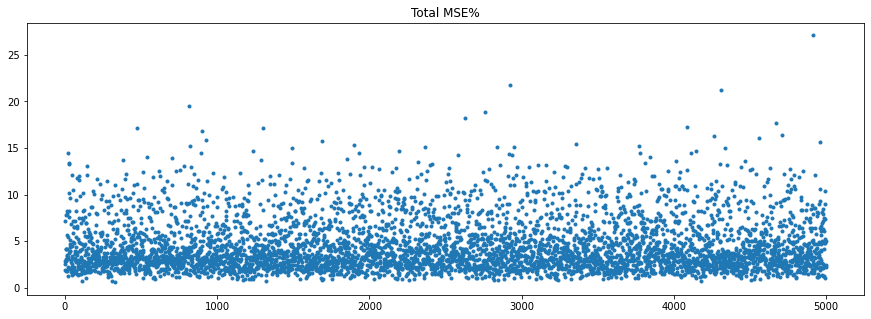

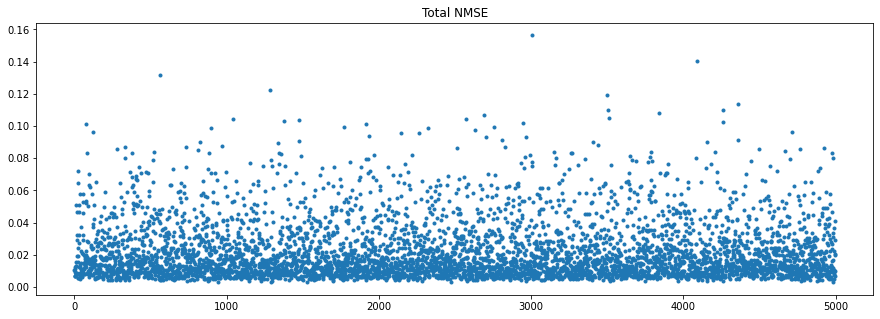

In [36]:
#X_test = X_test[:,:]
pred_res_view=pred_res_view[:,:,0]
X_test_view = X_test
#Y_test_view = Y_test[:,:774] + 1j*(Y_test[:,774:])
Y_test_view = Y_test
total_err = Y_test_view.real - pred_res_view.real
total_err_sqr = np.square(total_err)
total_err_sqr1 = np.square(Y_test_view.real)
total_msep = (np.mean(total_err_sqr,axis = 1)/np.max(total_err_sqr, axis = 1))*100
total_msep1=(np.mean(total_err_sqr,axis = 1)/np.mean(total_err_sqr1, axis = 1))

plt.figure(figsize=(15,5))
plt.title('Total MSE%')
plt.plot(total_msep,'.')
plt.figure(figsize=(15,5))
plt.title('Total NMSE')
plt.plot(total_msep1,'.')
print(np.mean(total_msep))